# Модель SEIR (классическая с учетом демографических данных)

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import xlsxwriter
import pandas as pd

In [2]:
df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = "G2017" )
interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

def Y1(x):
    return (-32.474 + 0.750*x[0] + 0.412*x[1] + 0.410*x[2] + 0.278*x[3]
            + 0.740*x[4] + 0.309*x[5] - 0.076*x[6] -  0.168*x[7] - 0.065*x[8] + 0.004*x[9]
            + 2.881*x[10] + 1.985*x[11] + 1.988*x[12] + 1.792*x[13] + 0.538*x[14])
def Y2 (x):
    return (-31.342 + 0.639*x[0] + 0.372*x[1] + 0.497*x[2] + 0.220*x[3]
            + 0.655*x[4] + 0.241*x[5] - 0.066*x[6] - 0.150*x[7] - 0.135*x[8] + 0.152*x[9]
            + 4.881*x[10] + 3.553*x[11] + 3.343*x[12] + 2.509*x[13] + 2.297*x[14])

In [3]:
minT = []
maxT = []
falls = []
fives = []
counter = 0
i = 0

for index, row in interestedRows.iterrows():
    minT.append(df['Мин'].tolist()[i])
    maxT.append(df['Макс'].tolist()[i])
    fall = 0
    if row['Осадки'] > 0.0:
        fall = 1
    falls.append(fall)
    i += 1
    if index > 4:
        minT.pop(0)
        maxT.pop(0)
        falls.pop(0)
        
#         соединим все это в один супер массив чтобы положить в функцию
    X = maxT + minT + falls

    if len(X) == 15:
        y1 = Y1(X)
        y2 = Y2(X)
#         print(y1, y2)
        if y1 < y2:
            fives.append(1)
        else:
            fives.append(0)
print(len(fives))

88


In [4]:
def r(t):
    SI = 0.75
    IE = 6.79
    ans = 0
    if int(t)>= len(fives):
        ans = 0
    else:    
        five = fives[int(t)]
        ans = SI * IE* five
    return ans

def seir(y, t):
    S, E, I, R = y
    def Lat(t, S, E, I, R):
        ans = r(t) * S * I - E/LP - m*E
        return ans
#     S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
    return [ m*(1. - S) - r(t)*S*I , Lat(t, S, E, I, R), E/LP - I/IP - m*I, I/IP - m*R]

In [5]:
#зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
LP = 4
IP = 1

In [6]:
# def integral(x,y):
#     intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
#     y = y[1:]
#     sum = 0
#     for i in range(len(intervals)):
#         sum+= intervals[i]*y[i]
#     return sum      

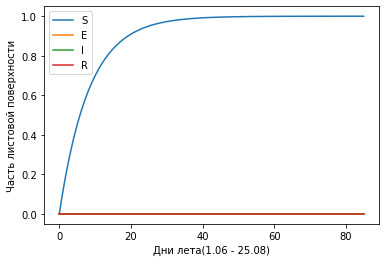

In [9]:
# Случай без вмешательства
I0 = 0
m = 0.12

temp = 0
t = np.linspace (0, 85, 850) #90 дней лета
y0 = [0., 0, I0, 0]
w = odeint (seir, y0, t)

S = w[:,0]
E = w[:,1]
I = w[:,2]
R = w[:,3]


fir = plt.figure()
for j in range (400, 850):
        temp += R[j] 
# print("Потери:", temp / 450. * 100, "%" )
plt.xlabel('Дни лета(1.06 - 25.08)')
plt.ylabel('Часть листовой поверхности')
plt.plot(t, S,t, E,t, I,t, R)
plt.legend(['S','E','I','R'])
# fir.savefig('/home/kira/Рабочий стол/Модель 2/1.png', bbox_inches='tight')

## Года с большими потерями ( 50% - 66% урожая пропало)

Потери: 60.268697547387106 %
Потери: 54.83416016952557 %
Потери: 53.529456670642084 %
Потери: 55.023454834481946 %
Потери: 46.98664133664906 %
Потери: 55.92983615726449 %
Потери: 32.10648852742471 %


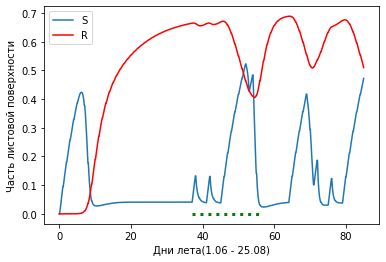

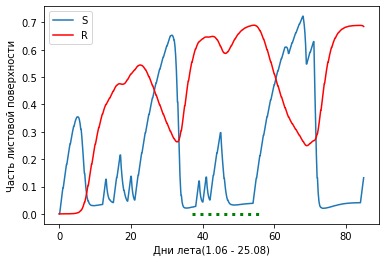

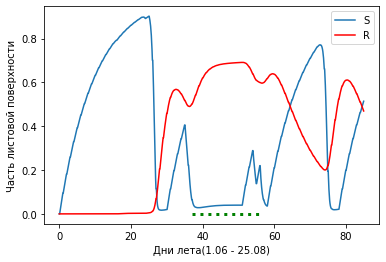

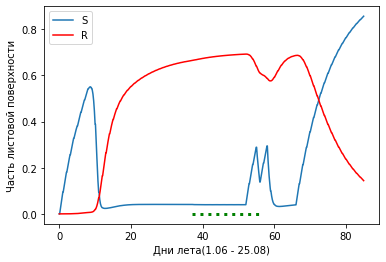

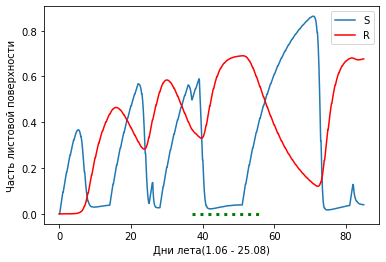

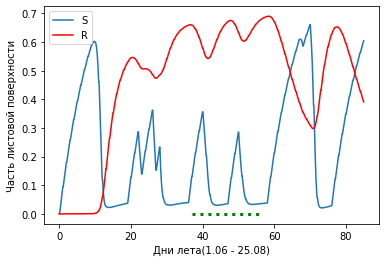

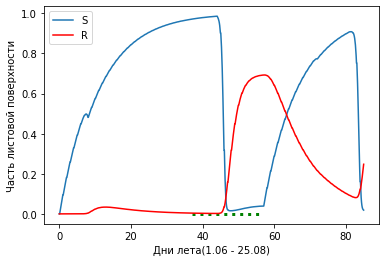

In [11]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]
interestedSheets = ['G1984','G2016','G2015', 'G2017', 'G2012', 'G2004', 'G2013']
# interestedSheets = ['G2015']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 2.5
    IP = 1.15
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        ans = 0
        if 36 < int(i) < 58:
            IE = 30.
            SI = 1.
        else:
            IE = 29.5
            SI = 1.
            
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        S, E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP - m*E
            return ans
        return [ m*(1. - S) - r(t)*S*I , Lat(t, S, E, I, R), E/LP - I/IP - m*I, I/IP - m*R]

    newS = np.array([0.00])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    m = 0.1
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 36 < i < 58:
            f += getFive(i)
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 800., newR[-1]]
        else:
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 8000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)

        S = w[:,0]
        E = w[:,1]
        I = w[:,2]
        R = w[:,3]
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))
    t1 = np.linspace(37, 57, 20)
#     W = np/

    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
    
#     proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета(1.06 - 25.08)')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t,newS)
    plt.plot(t, newR, 'r')
    plt.hlines(0, 37, 57,
          color = 'g',
          linewidth = 3,
          linestyle = ':')
    plt.legend(['S','R'])
#     fir.savefig('/home/kira/Рабочий стол/Модель 2/2016.png', bbox_inches='tight')

## Года со средними потерями ( 22% - 34% урожая пропало)

Потери: 20.521437502282264 %


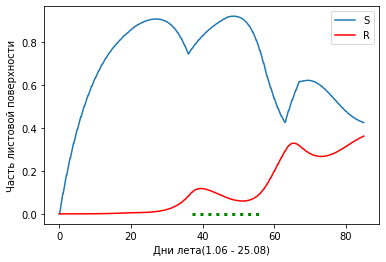

In [13]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]
interestedSheets1 = ['G1982','G1987','G1993', 'G1977', 'G1996', 'G1983', 'G2008']
interestedSheets = ['G1982']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим араметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 3.7
    IP = 0.915
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        ans = 0
        if 36 < int(i) < 58:
            IE = 4.2
            SI = 1.
        else:
            IE = 3.71
            SI = 1.
            
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        S, E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP - m*E
            return ans
    #     S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [ m*(1. - S) - r(t)*S*I , Lat(t, S, E, I, R), E/LP - I/IP - m*I, I/IP - m*R]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0.0001])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    m = 0.1
    u = 0.0
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 36 < i < 58:
            f += getFive(i)
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 1000., newR[-1]]
        else:
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 10000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)

        S = w[:,0]
        E = w[:,1]
        I = w[:,2]
        R = w[:,3]
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))
    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.01:
                print(temp)
        return 0
    proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета(1.06 - 25.08)')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t,newS)
    plt.plot(t, newR, 'r')
    plt.hlines(0, 37, 57,
          color = 'g',
          linewidth = 3,
          linestyle = ':')
    plt.legend(['S','R'])
#     fir.savefig('/home/kira/Рабочий стол/Модель 2/1982.png', bbox_inches='tight')

## Года с небольшими потерями ( 16% - 18% урожая пропало)

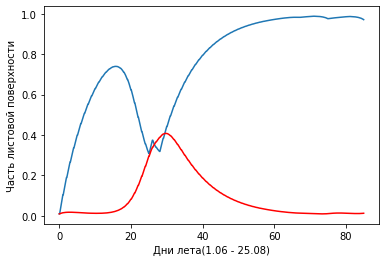

In [20]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]
interestedSheets1 = ['G2009','G2014','G1994', 'G1998']
interestedSheets = ['G2014']

for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 2.54
    IP = 1.13
    I0 = 0.01
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        ans = 0
        if 36 < int(i) < 58:
            IE = 4.55
            SI = 1.
        else:
            IE = 3.95
            SI = 1.
            
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        S, E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP - m*E
            return ans
    #     S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [ m*(1. - S) - r(t)*S*I , Lat(t, S, E, I, R), E/LP - I/IP - m*I, I/IP - m*R]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0.01])
    newE = np.array([0.01])
    newI = np.array([I0])
    newR = np.array([0.01])
    m = 0.1
    u = 0.0
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 36 < int(i) < 58:
            f += getFive(i)
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 500., newR[-1]]
        else:
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 5000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)

        S = w[:,0]
        E = w[:,1]
        I = w[:,2]
        R = w[:,3]
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))
#     def proverka():
#         for i in range (850):
#             temp =  newS[i] + newR[i]+ newE[i] + newI[i]
#             if temp >= 1.01:
#                 print(temp)
#         return 0
#     proverka()
#     temp = 0
#     for j in range (400, 850):
#         temp += newR[j] 
#     print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета(1.06 - 25.08)')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t,newS)
    plt.plot(t, newR, 'r')

#     fir.savefig('/home/kira/Рабочий стол/Модель 2/1982.png', bbox_inches='tight')

## Года с маленькими потерями ( 7% - 13% урожая пропало)

Потери: 2.9983302089273556 %


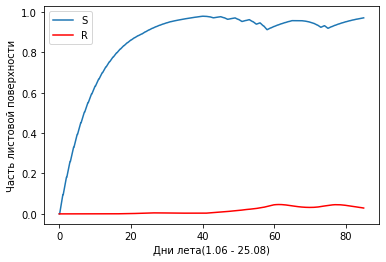

In [9]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]

interestedSheets1 = ['G2011','G1991','G2006', 'G1995', 'G2007']
interestedSheets = ['G1995']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 3.9
    IP = 1.06
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        ans = 0
        if 36 < int(i) < 58:
            IE = 3.48
            SI = 1.
        else:
            IE = 3.1
            SI = 1.
            
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        S, E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP - m*E
            return ans
    #     S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [ m*(1. - S) - r(t)*S*I , Lat(t, S, E, I, R), E/LP - I/IP - m*I, I/IP - m*R]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0.0001])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    m = 0.1
    u = 0.0
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 36 < int(i) < 58:
            f += getFive(i)
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 1000., newR[-1]]
        else:
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 10000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)

        S = w[:,0]
        E = w[:,1]
        I = w[:,2]
        R = w[:,3]
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))

    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
#     proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета(1.06 - 25.08)')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t,newS)
    plt.plot(t, newR, 'r')
    plt.legend(['S','R'])
    fir.savefig('/home/kira/Рабочий стол/1995.png', bbox_inches='tight')

## Года с незначительными потерями ( 1% - 5% урожая пропало)

Потери: 4.023662286499419 %


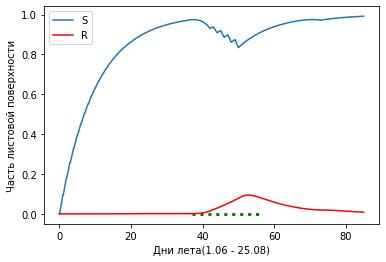

In [377]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]
interestedSheets1 = ['G1972','G1997','G2010', 'G2005', 'G2002', 'G1973', 'G1992']
interestedSheets = ['G1973']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 3.
    IP = 0.85
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        ans = 0
        if 36 < int(i) < 58:
            IE = 4.7
            SI = 1.
        else:
            IE = 4.11
            SI = 1.
            
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        S, E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP - m*E
            return ans
    #     S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [ m*(1. - S) - r(t)*S*I , Lat(t, S, E, I, R), E/LP - I/IP - m*I, I/IP - m*R]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0.0001])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    m = 0.1
    u = 0.0
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 36 < i < 58:
            f += getFive(i)
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 1100., newR[-1]]
        else:
            y0 = [newS[-1], newE[-1], newI[-1] + getFive(i)/ 11000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)

        S = w[:,0]
        E = w[:,1]
        I = w[:,2]
        R = w[:,3]
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))
    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
#     proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета(1.06 - 25.08)')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t,newS)
    plt.plot(t, newR, 'r')
    plt.hlines(0, 37, 57,
          color = 'g',
          linewidth = 3,
          linestyle = ':')
    plt.legend(['S','R'])
    fir.savefig('/home/kira/Рабочий стол/Модель 2/1973.png', bbox_inches='tight')